In [1]:
import requests
import json
import pandas as pd


# import style dims
url = 'https://raw.githubusercontent.com/john-adeojo/ufc_styles/main/data/02_intermediate/style_dims.json'

# Fetch the JSON file content
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    try:
        # Load the content into a list
        style_dims = json.loads(response.text)
        print("Data loaded successfully:")
    except json.JSONDecodeError as e:
        print(f"Failed to decode JSON: {e}")
else:
    print(f"Failed to fetch JSON file: {response.status_code}")

# import fighter data
fighter_df = pd.read_csv(r'https://github.com/john-adeojo/ufc_styles/blob/main/data/02_intermediate/fighter_data.csv?raw=true')

Data loaded successfully:


In [2]:
import os
import sys
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
project_dir = os.path.dirname(notebook_dir)

if project_dir not in sys.path:
    sys.path.append(project_dir)


In [5]:
fighter_df_clean = fighter_df.dropna()
fighter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11058 entries, 0 to 14001
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  11058 non-null  int64  
 1   R_fighter                   11058 non-null  object 
 2   B_fighter                   11058 non-null  object 
 3   date                        11058 non-null  object 
 4   Winner                      11058 non-null  object 
 5   weight_class                11058 non-null  object 
 6   avg_KD                      11058 non-null  float64
 7   avg_opp_KD                  11058 non-null  float64
 8   avg_SUB_ATT                 11058 non-null  float64
 9   avg_opp_SUB_ATT             11058 non-null  float64
 10  avg_REV                     11058 non-null  float64
 11  avg_opp_REV                 11058 non-null  float64
 12  avg_SIG_STR_att             11058 non-null  float64
 13  avg_SIG_STR_landed          110

In [55]:
fighter_df_clean['date'].describe()

count          11058
unique           630
top       2016-11-19
freq              38
Name: date, dtype: object

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
fighter_df_clean_copy = fighter_df_clean.copy()
fighter_df_clean_copy.loc[:, style_dims] = scaler.fit_transform(fighter_df_clean_copy[style_dims])
fighter_df_clean = fighter_df_clean_copy


In [26]:
weight_class = list(fighter_df_clean['weight_class'].drop_duplicates())
weight_class

['Featherweight',
 'WomenBantamweight',
 'WomenFlyweight',
 'Welterweight',
 'Bantamweight',
 'Middleweight',
 'Flyweight',
 'Lightweight',
 'Heavyweight',
 'CatchWeight',
 'WomenStrawweight',
 'LightHeavyweight',
 'WomenFeatherweight',
 'OpenWeight']

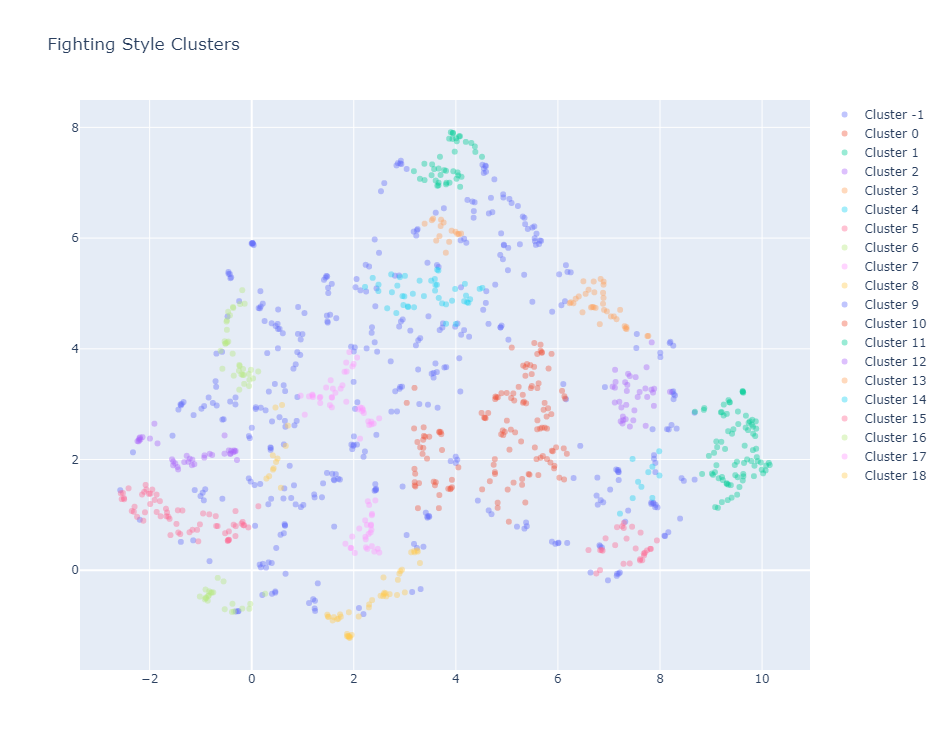

In [54]:
from scripts.cluster import ClusterAnalysis

ca = ClusterAnalysis(fighter_df_clean.loc[fighter_df_clean['weight_class'] == 'Featherweight'], n_neighbors=5, min_cluster_size=10, min_dist=0.1, metric='euclidean', cluster_dims=style_dims)
ca.run()
